# HOMEWORK 3

For this homework you are going to implement the **unsharp masking** filter (USM). It is a technique to improve the sharpness of an image by combining the image with its blurred (unsharp) version. See the Wikipedia [page](https://en.wikipedia.org/wiki/Unsharp_masking) for more details.

### Unsharp Masking (USP)
The USM technique consists of the following steps:
* Load the image you will be working with.
* Create a blurred (unsharp) version of the original image.
* Add the unsharp image (with a certain **weight**) to the original.

To sum it up, the USM performs the following operation:

`sharpened = original + (original − unsharp) × amount`

Even though we provide you an image to work with, you are welcome to use your own images :-)

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

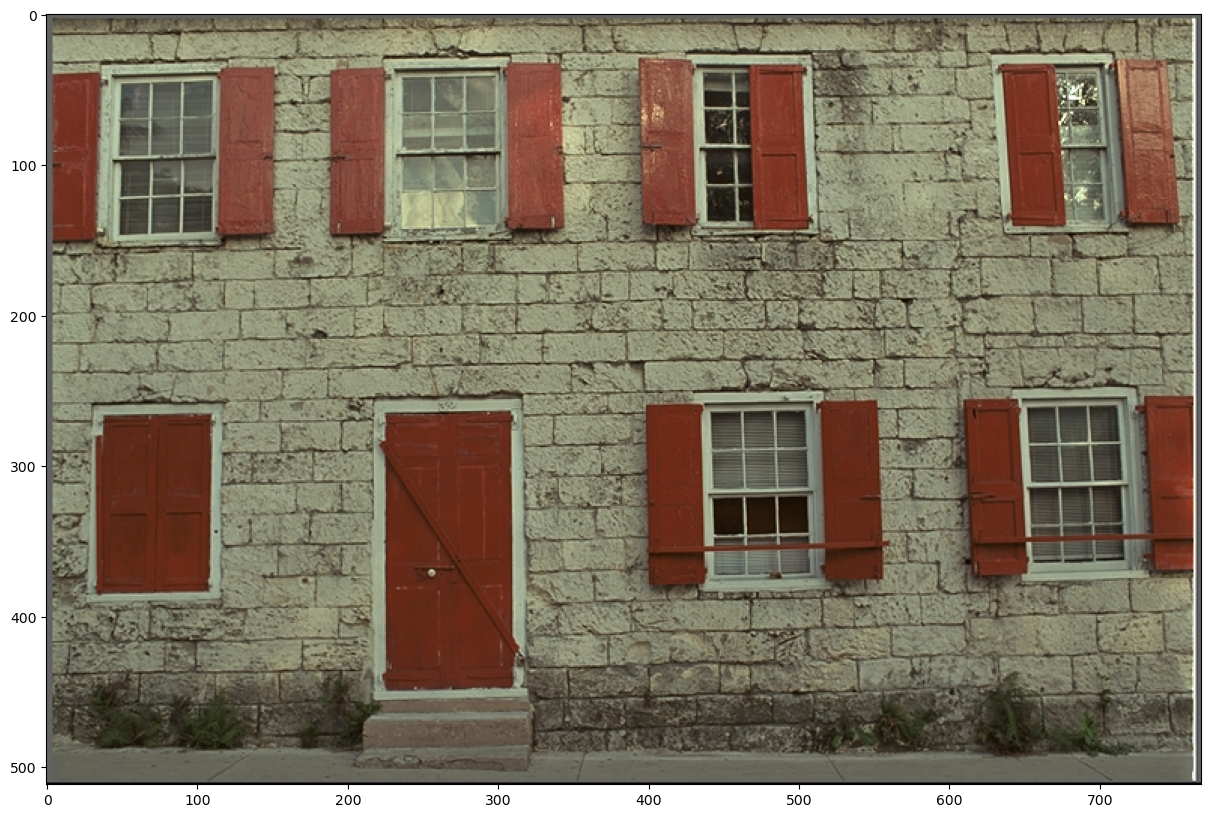

In [3]:
img = cv2.imread('kodim01.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

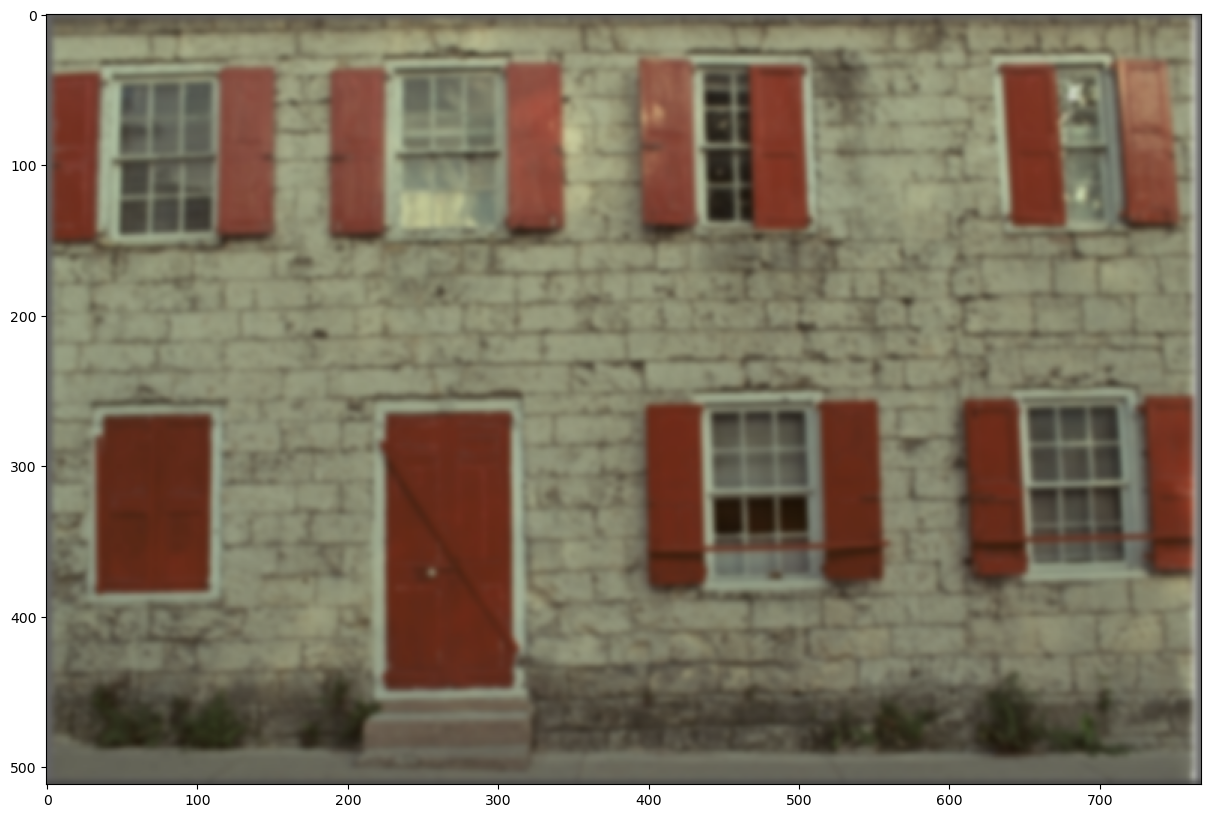

In [25]:
# Create a blurred (unsharp) version of the original image (you can use Gaussian blurring)

# 11, 11 - kernel size. I think this value gives us a reasonable amount of blurring 
# as small kernel size = less blurring and big kernel size = more blurring.
# 0 - so OpenCV can compute sigma based on the kernel size according to this
# https://docs.opencv.org/3.1.0/d4/d86/group__imgproc__filter.html#gac05a120c1ae92a6060dd0db190a61afa
unsharp = cv2.GaussianBlur(img, (11, 11), 0)
plt.imshow(unsharp)

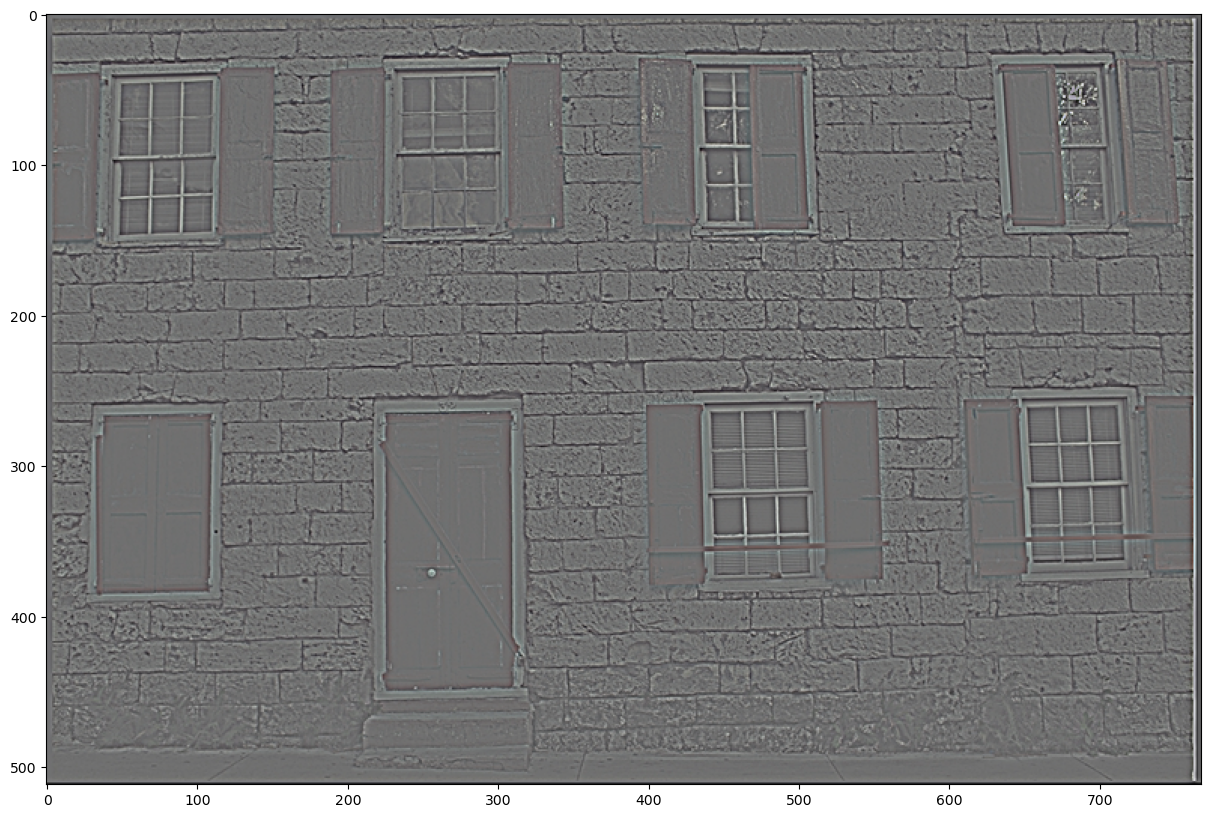

In [27]:
# Create the difference image (original − unsharp)
# Note: Remember that you are working with uint8 data types. Any addition or substractions
# might result in overflow or underflow, respectively. You can prevent this by casting the images to float.
img_f = img.astype(float)
unsharp_f = unsharp.astype(float)
diff = img_f - unsharp_f

# display diff result
diff_normalized = cv2.normalize(diff, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
plt.imshow(diff_normalized)

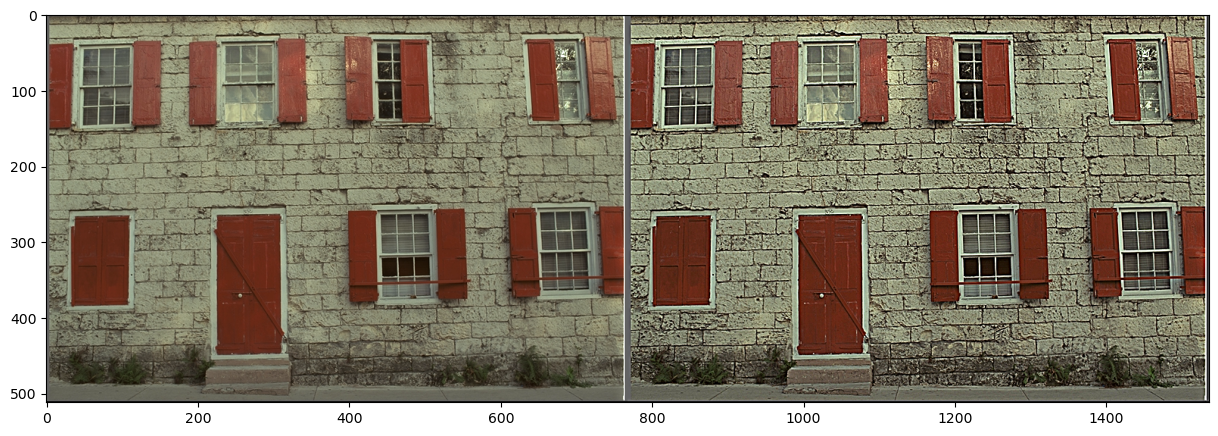

In [29]:
# Apply USM to get the resulting image using `sharpened = original + (original − unsharp) × amount`
# Note: Again, take care of underflows/overflows if necessary.
# Define the amount for sharpening

amount = 1.5

# Applying USM
sharpened = img_f + diff * amount

# Clip values to the valid range [0, 255] to avoid overflow/underflow
# and cast to uint8 to display
sharpened = np.clip(sharpened, 0, 255).astype('uint8')

# display the result
out = np.hstack([img, sharpened])
plt.imshow(out)

### Questions
* What is a good (reasonable) value for the `amount` parameter?
 * I think it's between 1.0 and 2.0, so I chose 1.5 as the best one. 
 * What happens if it is too small?
 * No sharpening effect is visible or barely noticeable.
 * What happens if it is too large?
 * The resulting image starts looking cartoonish or unreal.